Confusion Matrix:
[[41  0  1]
 [ 1 40  1]
 [ 0  0 41]]


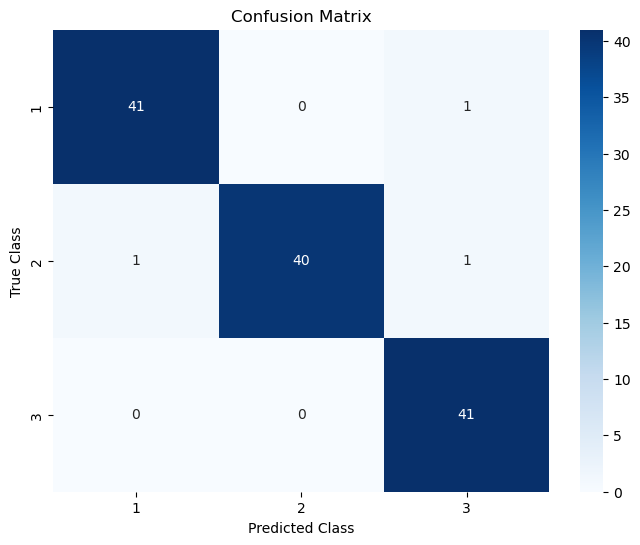



Rates per class:
Class: 1
  True Positive (TP): 41
  False Positive (FP): 1
  False Negative (FN): 1
  True Negative (TN): 82

Class: 2
  True Positive (TP): 40
  False Positive (FP): 0
  False Negative (FN): 2
  True Negative (TN): 83

Class: 3
  True Positive (TP): 41
  False Positive (FP): 2
  False Negative (FN): 0
  True Negative (TN): 82



Overall Accuracy: 0.9760


Precision, Recall, F1-Score per class:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98        42
           2       1.00      0.95      0.98        42
           3       0.95      1.00      0.98        41

    accuracy                           0.98       125
   macro avg       0.98      0.98      0.98       125
weighted avg       0.98      0.98      0.98       125





<Figure size 1000x600 with 0 Axes>

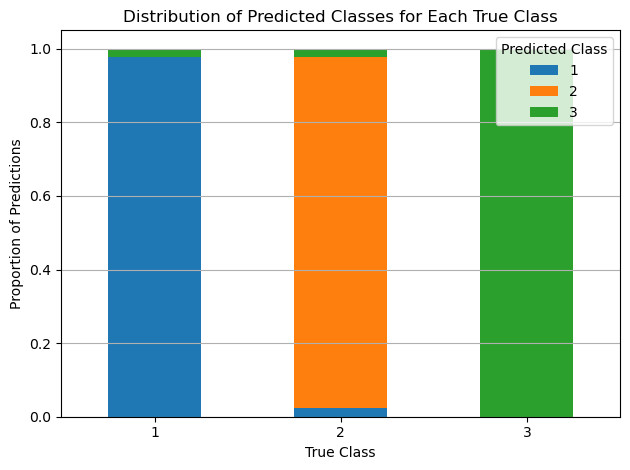

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the path to your prediction parquet file
output_path = "../data/datasets/output"  # Adjusted path
parquet_file = os.path.join(output_path, 'model_prediction.parquet')

# Load the DataFrame from the Parquet file
try:
    df_pred = pd.read_parquet(parquet_file)
except FileNotFoundError:
    print(f"Error: File not found at {parquet_file}")
    df_pred = None

if df_pred is not None:
    y_true = df_pred['target']
    y_pred = df_pred['prediction']
    class_names_numerical = sorted(y_true.unique())
    class_names_str = [str(c) for c in class_names_numerical]

    # --- 1. Confusion Matrix ---
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names_str, yticklabels=class_names_str)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n")

    # --- 2. Rates (TP, FP, TN, FN) per class ---
    print("Rates per class:")
    for i, class_name in enumerate(class_names_numerical):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - tp - fp - fn
        print(f"Class: {class_name}")
        print(f"  True Positive (TP): {tp}")
        print(f"  False Positive (FP): {fp}")
        print(f"  False Negative (FN): {fn}")
        print(f"  True Negative (TN): {tn}")
        print()
    print("\n")

    # --- 3. Accuracy, Precision, Recall, F1-Score (overall and per class) ---
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Overall Accuracy: {accuracy:.4f}")
    print("\n")

    print("Precision, Recall, F1-Score per class:")
    print(classification_report(y_true, y_pred, target_names=class_names_str))
    print("\n")

    # --- 4. Stacked Bar Chart (Distribution of Predictions per True Class) ---
    prediction_counts = df_pred.groupby('target')['prediction'].value_counts(normalize=True).unstack().fillna(0)
    plt.figure(figsize=(10, 6))
    prediction_counts.plot(kind='bar', stacked=True)
    plt.title('Distribution of Predicted Classes for Each True Class')
    plt.xlabel('True Class')
    plt.ylabel('Proportion of Predictions')
    plt.gca().set_xticklabels(class_names_str, rotation=0)
    plt.legend(title='Predicted Class')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()